# Observations and Insights 

# Capomulin treatmeant of mouse b742

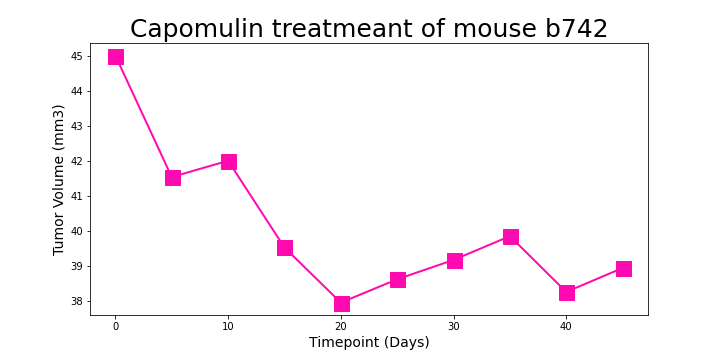

    When mouse  b742 was treated with the drug Capomulin, we noticed a dramaatic decrease in tumor volume (mm3) in the first 20 days, then a slight rebound with tumor growth over the next 15days, then finally a decrease in tumor size on the 40th day. Showing that with the use of this drug it can reduce tumor size 

# Mouse Weight Versus Average Tumor Volume

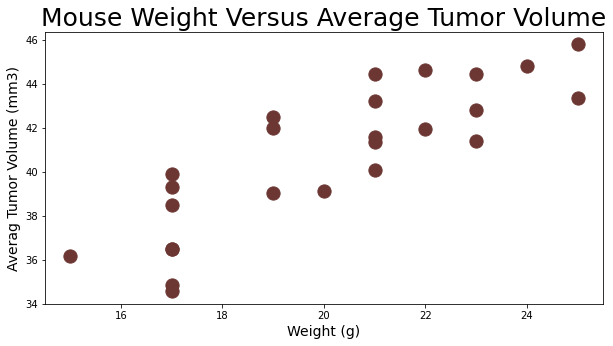

    When looking at the correlation betwee
    the mouse weight and the average tumor volume there was a strong correlation
    of 0.84. This proved that as the weight of the mouse increased so did the average tumor volume

# Quartiles

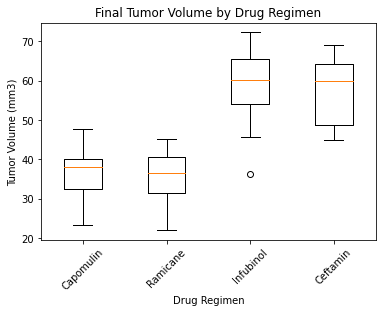

    From looking at the data Capomulin and Ramicane where more effective at reducing the average tumour volume (mm3) in the study mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import shutil

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
combined_data.head()
# combined_data.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].value_counts())


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()


Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = combined_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mouse_study.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

In [10]:
# mean, median, variance, standard deviation, and SEM
# calculated mean of tumor volume
tumor_volume = drug_regimen["Tumor Volume (mm3)"].mean()
# calculated median of tumor volume
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()
# calculated variance of tumor volume
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()
# calculated STD of tumor volume
tumor_STD = drug_regimen["Tumor Volume (mm3)"].std()
# calculated SEM of tumor volume
tumor_SEM = drug_regimen["Tumor Volume (mm3)"].sem()
# Assembles results into a single summary dataframe
drug_summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_volume,
                                "Median Tumor Volume":tumor_median,
                                "Variance Tumor Volume":tumor_variance,
                                "STD Tumor Volume":tumor_STD,
                                "SEM Tumor Volume":tumor_SEM
                            }) 
drug_summary_df
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts

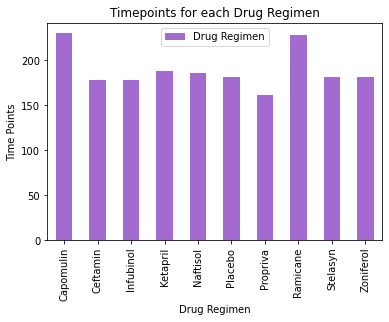

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First create a dataframe grouping by the 'Drug Regimen' column
drug_regimen =  combined_data.groupby("Drug Regimen")
# Create a dataframe counting the number of data points for each Drug Regimen
drug_count = pd.DataFrame(drug_regimen["Drug Regimen"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors 
drug_chart = drug_count.plot(kind="bar", title="Timepoints for each Drug Regimen", color="#A36ACF")
# Set the X-label and Y-label
drug_chart.set_xlabel("Drug Regimen")
# unsure if its in sec/min/hrs
drug_chart.set_ylabel("Time Points")



# print and move img to the figures folder
plt.savefig("./figures/pa_barchart.png", bbox_inches='tight')

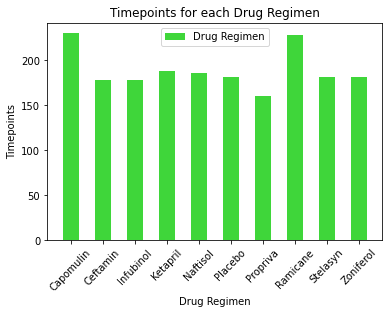

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

# create the bar chart
plt.bar(x_axis, drug_count["Drug Regimen"], color="#3FD63A", align="center", width=0.5)

# very specific rotation
plt.xticks(tick_locations, list(drug_count.index), rotation=45.9874)

# Create title and labels
plt.title("Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="upper center")


# print and move img to the figures folder
plt.savefig("./figures/py_barchart.png", bbox_inches='tight')

# Pie plots

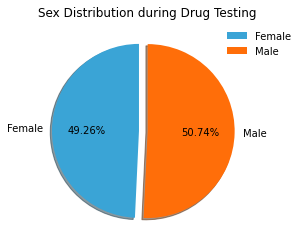

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse_study.groupby(["Sex"]).count() 
# Create a pie chart based upon the trip duration of that single bike
mice_pie = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution during Drug Testing"),
                            colors = ["#3AA4D6","#FF6E09"],autopct = "%.2f%%",
                                                           shadow=True, 
                                                           explode=(0.1,0), 
                                                           startangle=90)

#Put y label empty so it doesn't get in the way of Female label
mice_pie.set_ylabel("")

#Put label and adjust it with bbox_to_anchor so it is not on top of your graph
mice_pie.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1))

# print and move img to the figures folder
plt.savefig("./figures/pie_1.png", bbox_inches='tight')

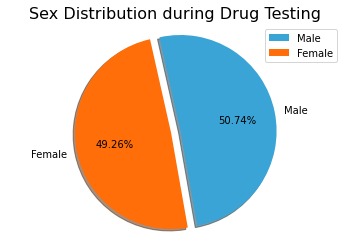

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mouse_study["Sex"].value_counts()

#Create variables to use in pie chart 
explode = (0.1,0)
labels = list(mice_sex.index)
colors =["#3AA4D6","#FF6E09"]


#Create a pie chart
plt.pie(mice_sex, 
        explode=explode, 
        labels=labels, 
        colors = colors,
        autopct="%.2f%%", 
        shadow=True, 
        startangle=280)

 #label title and axis
plt.title("Sex Distribution during Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
mice_sex

# print and move img to the figures folder
plt.savefig("./figures/pie_2.png", bbox_inches='tight')

 # Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint=max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_df = pd.merge(max_timepoint , clean_mouse_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
boxplot_list = []


In [17]:
for drug in treatments:
    final_tumor_vol = tx_df.loc[tx_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    

    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    boxplot_list.append(list(final_tumor_vol.dropna()))


--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.1251644 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56165229 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquar

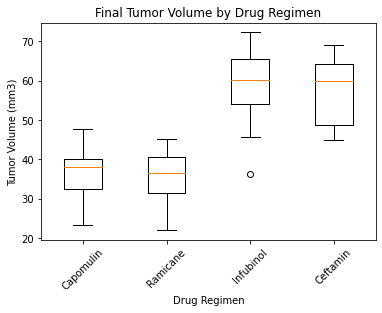

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(boxplot_list)
plt.xlabel("Drug Regimen")
plt.xticks(ticks=[1,2,3,4],labels=treatments, rotation=45)
plt.ylabel('Tumor Volume (mm3)')
plt.title("Final Tumor Volume by Drug Regimen")


    
# print and move img to the figures folder
plt.savefig("./figures/box_plot.png", bbox_inches='tight')

# Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
capomulin_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b742",:]
capomulin_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


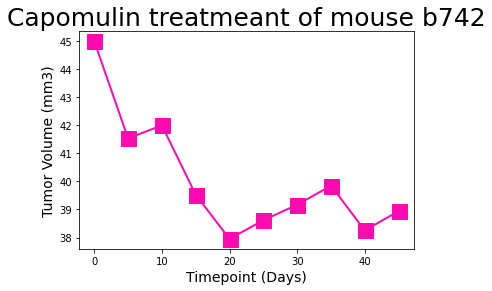

In [26]:
x_axis = capomulin_plot_df["Timepoint"]
tumsiz = capomulin_plot_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="s",color="#FF09B1", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)



# print and move img to the figures folder
plt.savefig("./figures/line_plot.png", bbox_inches='tight')

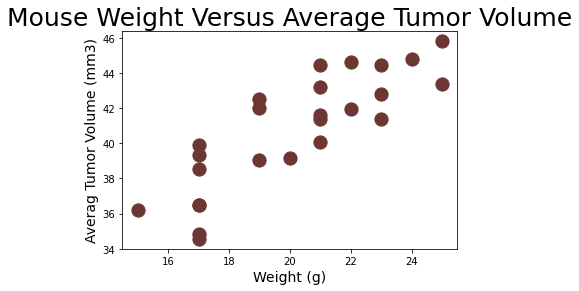

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capm_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="#6C3733")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)




# print and move img to the figures folder
plt.savefig("./figures/scatter_plot.png", bbox_inches='tight')

In [22]:
## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [24]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


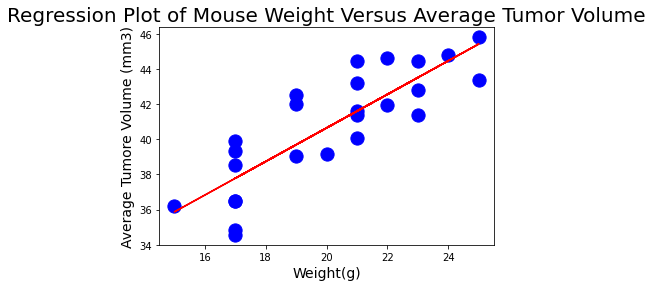

In [29]:
# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")


# print and move img to the figures folder
plt.savefig("./figures/linear_regression.png", bbox_inches='tight')